In [22]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from PIL import Image
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
import os
import shutil
from tensorflow.keras import metrics
from keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow import keras

# Start with just one image
1. upload image
2. create duplicate image with lines
3. build model and try to run with one image

In [23]:
#read in one image as target (or y)
y = np.array(Image.open('Data/Unruled/sc0181_NEW.jpg'))
#show image from array
Image.fromarray(y)

FileNotFoundError: [Errno 2] No such file or directory: 'Data/Unruled/sc0181_NEW.jpg'

In [24]:
y.shape

NameError: name 'y' is not defined

In [25]:
#2. create lines on target image

X = np.array(y)
#[row_start:row_stop: row_step, col_start:col_stop:col_step ] 
X[::40+np.random.randint(-2,2),:] = 80+np.random.randint(-60, 130)
#show new image from array
Image.fromarray(X)


NameError: name 'y' is not defined

In [26]:
image_to_predict = np.array(Image.open('Data/Original_Ruled/IMG_0002.jpg'))

NameError: name 'X' is not defined

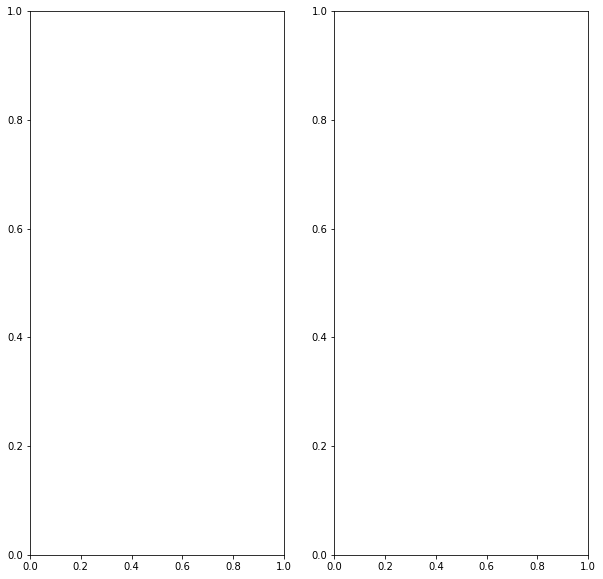

In [27]:
fig, axs = plt.subplots(1,2, figsize = (10,10))
[ax.imshow(x) for ax, x in zip(axs.flatten(), [X, y])];


In [28]:
#reshape to fit into model
X = X.reshape(*X.shape,1)
X.shape

NameError: name 'X' is not defined

# Bring in entire data set

In [65]:
#y
y_list = []
for image in os.listdir('Data/y_variables/Unruled'):
    
    y_image = np.array((Image.open(f'Data/y_variables/Unruled/{image}')))
    y_image = y_image.reshape(*y_image.shape,1)
    y_list.append(y_image)
                  
    

In [66]:
#X

X_list = []
for image in os.listdir('Data/X_variables/computer_generated_lines'):
    
    
    X_image = np.array(Image.open(f'Data/X_variables/computer_generated_lines/{image}'))
    
    #X_image = np.array((Image.open(f'Data/computer_generated_lines/{image}'))).reshape(*X_image.shape,1)
    #print(type(x_image))
    X_image = X_image.reshape(*X_image.shape,1)
    X_list.append(X_image)
                  
    

In [69]:
len(y_list), len(X_list)

(669, 669)

In [58]:
# train_datagen = ImageDataGenerator()
# #validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
# X_train_generator = train_datagen.flow_from_directory(
#         '/Users/megan/Galvanize/capstone_folder/Capstone_3/Data/X_variables',
#         target_size=(500, 400),
#         color_mode='grayscale',
#         batch_size=32,
#         class_mode='input')
# y_train_generator = train_datagen.flow_from_directory(
#         '/Users/megan/Galvanize/capstone_folder/Capstone_3/Data/y_variables',
#         target_size=(500, 400),
#         color_mode='grayscale',
#         batch_size=32,
#         class_mode='input')


Found 669 images belonging to 1 classes.
Found 669 images belonging to 1 classes.


In [61]:
next(X_train_generator)[1]

array([[[[102.],
         [102.],
         [102.],
         ...,
         [102.],
         [102.],
         [102.]],

        [[243.],
         [243.],
         [243.],
         ...,
         [243.],
         [243.],
         [243.]],

        [[246.],
         [246.],
         [246.],
         ...,
         [246.],
         [246.],
         [246.]],

        ...,

        [[245.],
         [245.],
         [245.],
         ...,
         [245.],
         [245.],
         [245.]],

        [[245.],
         [245.],
         [245.],
         ...,
         [245.],
         [245.],
         [245.]],

        [[245.],
         [245.],
         [245.],
         ...,
         [245.],
         [245.],
         [245.]]],


       [[[162.],
         [162.],
         [162.],
         ...,
         [162.],
         [162.],
         [162.]],

        [[254.],
         [254.],
         [254.],
         ...,
         [254.],
         [254.],
         [254.]],

        [[251.],
         [251.],
      

In [ ]:
# # of images(669), X images, y images, 1

In [68]:
# image_generator = train_datagen.flow(
#     x=X_list,
#     y=y_list,
#     batch_size=32,
#     shuffle=False)

ValueError: `x` (images tensor) and `y` (labels) should have the same length. Found: x.shape = (500, 400, 1), y.shape = (669, 500, 400, 1)

In [39]:
#3.build the model

model = Sequential()
model.add(Input((500, 400,1)))
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))

model.add(Dense(128,  activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense(2,    activation='linear', name="bottleneck"))
model.add(Dense(64,  activation='relu'))
model.add(Dense(128,  activation='relu'))
model.add(Dense(784,  activation='linear'))

model.add(Conv2DTranspose(filters = 32, kernel_size=(3,3), activation='relu'))
model.add(Conv2DTranspose(filters = 32, kernel_size=(3,3), activation='relu'))
model.add(Conv2DTranspose(filters = 32, kernel_size=(3,3), activation='relu'))
model.add(Conv2DTranspose(filters = 1, kernel_size=(3,3), activation='linear', padding='same'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 498, 398, 32)      320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 496, 396, 32)      9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 494, 394, 32)      9248      
_________________________________________________________________
dense (Dense)                (None, 494, 394, 128)     4224      
_________________________________________________________________
dense_1 (Dense)              (None, 494, 394, 64)      8256      
_________________________________________________________________
bottleneck (Dense)           (None, 494, 394, 2)       130       
_________________________________________________________________
dense_2 (Dense)              (None, 494, 394, 64)     

In [40]:
#4 compile your model

# METRICS = [ metrics.CategoricalAccuracy(name='ACCURACY'),
#             metrics.AUC(name='AUC',curve='pr', multi_label=False),
#            metrics.SensitivityAtSpecificity(0.5, name='Sens@Spec'),
#            metrics.SpecificityAtSensitivity(0.5, name='Spec@Sens')]

# METRICS = [ metrics.Accuracy(name='ACCURACY'),
#             metrics.AUC(name='AUC')]

model.compile(loss = 'mse', optimizer = 'adam', metrics='Accuracy')


In [41]:
#5 set up tensorboard

checkpoint_filepath = './tmp/checkpoint'
tensorboard = TensorBoard(log_dir="./logs",
    histogram_freq=2,
    write_graph=True,
    write_images=True,
    update_freq="epoch",
    profile_batch=2,
    embeddings_freq=0,
    embeddings_metadata=None)

# early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
# model_cp = ModelCheckpoint(filepath=checkpoint_filepath, save_best_only=True)
model_cp = ModelCheckpoint(filepath=checkpoint_filepath)
early_stopping = EarlyStopping(monitor='loss',patience=10, restore_best_weights=True)

In [ ]:
#created generator that zips together X and y

def new_autoencoder_generator(X_train_generator, y_train_generator):
    for 
    
    return new_generator

In [42]:
# for X in X_list:
#     for y in y_list:

#         model.fit(x=np.array([X]), y=np.array([y]), epochs = 500, verbose=1, callbacks=[tensorboard, early_stopping,  model_cp])

model.fit(x=np.array(X_list), y=, epochs = 100, verbose=1, callbacks=[tensorboard, early_stopping,  model_cp])

ValueError: `y` argument is not supported when using `keras.utils.Sequence` as input.

In [45]:
next(X_train_generator).shape

(32, 500, 400, 1)

In [46]:
type(X_train_generator)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [ ]:
#!tensorboard --logdir=logs
np.array(X_list).shape

In [ ]:
# result = model.predict(np.array([X]))
result = model.predict(np.array([image_to_predict.reshape(*image_to_predict.shape, 1)]))
result = result.astype(np.uint8).reshape(500,400)
Image.fromarray(result)

In [ ]:
#to create all images with random line widths and depth - only need to do once

# for image in os.listdir('Data/Unruled'):

#     y=np.array((Image.open(f'Data/Unruled/{image}')))
#     X = np.array(y)
#     X[::40+np.random.randint(-20,20),:] = 80+np.random.randint(-60, 130)
#     pil_X = Image.fromarray(X)
#     pil_X.save(f'Data/computer_generated_lines/lined_{image}')
